In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train_data.csv',index_col="調査日",parse_dates=True)
df1 = pd.read_csv('data/train_data_1mon.csv',index_col="調査日",parse_dates=True)
df2 = pd.read_csv('data/train_data_2mon.csv',index_col="調査日",parse_dates=True)
df3 = pd.read_csv('data/train_data_3mon.csv',index_col="調査日",parse_dates=True)
df = df.resample("W-MON").last()
df1 = df1.resample("W-MON").last()
df2 = df2.resample("W-MON").last()
df3 = df3.resample("W-MON").last()

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [5]:
import statsmodels.api as sm 

1ヶ月前

In [6]:
df2

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-02-27,219,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-03-06,212,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-03-13,206,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-03-20,208,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-03-27,208,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,170,11.128571,3.642857,5.528571,11.800000,16.071429,3.514286,2.042857,4.571429,3.828571
2022-02-14,193,7.714286,3.214286,6.757143,8.085714,3.928571,6.800000,-1.500000,3.714286,4.242857
2022-02-21,192,6.928571,1.571429,5.671429,7.557143,1.000000,7.971429,-3.157143,0.428571,4.200000


In [7]:
train = df2[:-24]
test = df2[-24:]

In [8]:
len(train)

239

In [9]:
train.head()

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-02-27,219,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-03-06,212,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-03-13,206,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-03-20,208,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-03-27,208,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714


In [10]:
len(test)

24

In [11]:
y = train["キャベツ"]
X = train[train.columns[train.columns != "キャベツ"]]

In [12]:
y

調査日
2017-02-27    219
2017-03-06    212
2017-03-13    206
2017-03-20    208
2017-03-27    208
             ... 
2021-08-23    155
2021-08-30    161
2021-09-06    159
2021-09-13    188
2021-09-20    204
Freq: W-MON, Name: キャベツ, Length: 239, dtype: int64

In [13]:
X

,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,
2017-02-27,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-03-06,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-03-13,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-03-20,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-03-27,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...
2021-08-23,23.042857,2.571429,3.285714,21.957143,1.785714,4.342857,15.157143,6.071429,1.228571
2021-08-30,24.728571,34.000000,3.757143,21.300000,48.500000,0.657143,16.128571,14.785714,1.028571
2021-09-06,26.100000,4.928571,3.957143,23.657143,6.428571,3.600000,19.028571,8.357143,3.485714


コード参考:https://www.lifull.blog/entry/2019/12/25/151030

In [14]:
import itertools

p = q = range(0, 3)
sp = sd = sq = range(0, 2)

pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(sp, sd, sq))]

In [15]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(y,X, order = param, seasonal_order = param_seasonal,freq="W-MON")
            results = mod.fit()
            print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

print('AIC最小のモデル：', best_result)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52533D+00    |proj g|=  3.55247D-03

At iterate    5    f=  4.29646D+00    |proj g|=  8.70921D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     20      1     0     0   8.709D-06   4.296D+00
  F =   4.2964597510016551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  4.36760D+00    |proj g|=  2.57859D-01

At iterate    5    f=  4.29811D+00    |proj g|=  2.80568D-02

At iterate   10    f=  4.29646D+00    |proj g|=  6.80053D-04

At iterate   15    f=  4.29646D+00    |proj g|=  1.33282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     17     20      1     0     0   2.211D-05   4.296D+00
  F =   4.2964569562194770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  5.28204D+00    |proj g|=  2.19491D-03
  ys=-2.870E+00  -gs= 6.850E-01 BFGS update SKIPPED

At iterate    5    f=  3.63563D+00    |proj g|=  4.51980D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     25      2     1     0   1.011D-05   3.636D+00
  F =   3.6356164644824429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1757.82467002260

 This problem is unconstrained.



At iterate    0    f=  3.63739D+00    |proj g|=  2.99335D-01

At iterate    5    f=  3.53765D+00    |proj g|=  9.12279D-03

At iterate   10    f=  3.51174D+00    |proj g|=  3.28539D-03

At iterate   15    f=  3.51017D+00    |proj g|=  1.23767D-03

At iterate   20    f=  3.50966D+00    |proj g|=  1.13589D-03

At iterate   25    f=  3.50956D+00    |proj g|=  2.53596D-04

At iterate   30    f=  3.50954D+00    |proj g|=  5.36110D-04

At iterate   35    f=  3.50952D+00    |proj g|=  2.48050D-04

At iterate   40    f=  3.50951D+00    |proj g|=  1.12932D-04

At iterate   45    f=  3.50951D+00    |proj g|=  1.07813D-04

At iterate   50    f=  3.50951D+00    |proj g|=  6.06270D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.29828D+00    |proj g|=  5.05046D-03

At iterate    5    f=  4.29646D+00    |proj g|=  1.90204D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      8     11      1     0     0   8.720D-06   4.296D+00
  F =   4.2964568242139016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2075.706361974245
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.



At iterate    0    f=  4.36056D+00    |proj g|=  2.44880D-01

At iterate    5    f=  4.31895D+00    |proj g|=  9.77336D-02

At iterate   10    f=  4.29648D+00    |proj g|=  3.68955D-03

At iterate   15    f=  4.29646D+00    |proj g|=  5.05435D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     16     19      1     0     0   2.702D-05   4.296D+00
  F =   4.2964583632952174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.57751D+00    |proj g|=  1.11871D-01

At iterate    5    f=  3.55367D+00    |proj g|=  1.08946D-02

At iterate   10    f=  3.54435D+00    |proj g|=  8.84991D-04

At iterate   15    f=  3.54411D+00    |proj g|=  1.57350D-03

At iterate   20    f=  3.54403D+00    |proj g|=  6.24204D-04

At iterate   25    f=  3.54401D+00    |proj g|=  1.65837D-04

At iterate   30    f=  3.54401D+00    |proj g|=  4.54291D-05

At iterate   35    f=  3.54400D+00    |proj g|=  3.90981D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     39     46      1     0     0   9.893D-06   3.544D+00
  F =   3.54400469122

 This problem is unconstrained.



At iterate    0    f=  3.76035D+00    |proj g|=  5.52317D-01

At iterate    5    f=  3.51579D+00    |proj g|=  3.79154D-02

At iterate   10    f=  3.50922D+00    |proj g|=  1.69538D-03

At iterate   15    f=  3.50876D+00    |proj g|=  5.44433D-03

At iterate   20    f=  3.50854D+00    |proj g|=  1.52589D-03

At iterate   25    f=  3.50836D+00    |proj g|=  2.87554D-04

At iterate   30    f=  3.50831D+00    |proj g|=  2.35036D-04

At iterate   35    f=  3.50826D+00    |proj g|=  2.16505D-03

At iterate   40    f=  3.50823D+00    |proj g|=  3.78739D-04

At iterate   45    f=  3.50822D+00    |proj g|=  1.21567D-04

At iterate   50    f=  3.50821D+00    |proj g|=  8.82761D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   30    f=  4.09185D+00    |proj g|=  1.47603D-04

At iterate   35    f=  4.09185D+00    |proj g|=  7.29813D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     39     44      1     0     0   1.057D-04   4.092D+00
  F =   4.0918538645648121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 0, 0, 52) - AIC: 1977.90614726198
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    0    f=  4.16697D+00    |proj g|=  1.69783D-01

At iterate    5    f=  4.10208D+00    |proj g|=  1.58321D-02

At iterate   10    f=  4.09438D+00    |proj g|=  7.35412D-03

At iterate   15    f=  4.09259D+00    |proj g|=  6.02588D-03

At iterate   20    f=  4.09188D+00    |proj g|=  8.03752D-04

At iterate   25    f=  4.09182D+00    |proj g|=  3.92145D-04

At iterate   30    f=  4.09180D+00    |proj g|=  1.47337D-04

At iterate   35    f=  4.09180D+00    |proj g|=  1.49971D-04

At iterate   40    f=  4.09180D+00    |proj g|=  8.79926D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     40     45   

 This problem is unconstrained.



At iterate    0    f=  3.49761D+00    |proj g|=  1.20268D-01

At iterate    5    f=  3.47166D+00    |proj g|=  8.44531D-03

At iterate   10    f=  3.46203D+00    |proj g|=  4.65078D-03

At iterate   15    f=  3.46089D+00    |proj g|=  8.24391D-04

At iterate   20    f=  3.46075D+00    |proj g|=  8.77841D-04

At iterate   25    f=  3.46073D+00    |proj g|=  2.98426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     34      1     0     0   1.308D-05   3.461D+00
  F =   3.4607287638743949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.49761D+00    |proj g|=  2.38829D-01

At iterate    5    f=  3.39076D+00    |proj g|=  1.09808D-02

At iterate   10    f=  3.35598D+00    |proj g|=  4.48834D-02

At iterate   15    f=  3.34623D+00    |proj g|=  4.47811D-03

At iterate   20    f=  3.34445D+00    |proj g|=  1.37983D-03

At iterate   25    f=  3.34427D+00    |proj g|=  1.97021D-03

At iterate   30    f=  3.34414D+00    |proj g|=  4.86507D-04

At iterate   35    f=  3.34411D+00    |proj g|=  5.96980D-04

At iterate   40    f=  3.34407D+00    |proj g|=  5.22353D-04

At iterate   45    f=  3.34404D+00    |proj g|=  3.50763D-04

At iterate   50    f=  3.34403D+00    |proj g|=  2.45591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.14302D+00    |proj g|=  1.66806D-01

At iterate    5    f=  4.10229D+00    |proj g|=  1.66423D-02

At iterate   10    f=  4.09445D+00    |proj g|=  1.07595D-02

At iterate   15    f=  4.09247D+00    |proj g|=  5.75296D-03

At iterate   20    f=  4.09187D+00    |proj g|=  8.94313D-04

At iterate   25    f=  4.09182D+00    |proj g|=  4.96237D-04

At iterate   30    f=  4.09181D+00    |proj g|=  2.51553D-04

At iterate   35    f=  4.09180D+00    |proj g|=  4.01448D-04

At iterate   40    f=  4.09180D+00    |proj g|=  6.30923D-05

At iterate   45    f=  4.09180D+00    |proj g|=  9.99771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.16101D+00    |proj g|=  1.65893D-01

At iterate    5    f=  4.10241D+00    |proj g|=  1.39043D-02

At iterate   10    f=  4.09500D+00    |proj g|=  2.61743D-02

At iterate   15    f=  4.09225D+00    |proj g|=  1.54761D-02

At iterate   20    f=  4.09188D+00    |proj g|=  9.75010D-04

At iterate   25    f=  4.09182D+00    |proj g|=  3.96630D-04

At iterate   30    f=  4.09180D+00    |proj g|=  8.09602D-04

At iterate   35    f=  4.09179D+00    |proj g|=  7.11529D-04

At iterate   40    f=  4.09179D+00    |proj g|=  2.16078D-04

At iterate   45    f=  4.09178D+00    |proj g|=  6.09112D-04

At iterate   50    f=  4.09159D+00    |proj g|=  1.43795D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.44623D+00    |proj g|=  1.02483D-01

At iterate    5    f=  3.40345D+00    |proj g|=  8.87537D-03

At iterate   10    f=  3.38000D+00    |proj g|=  3.34269D-03

At iterate   15    f=  3.37963D+00    |proj g|=  2.54594D-03

At iterate   20    f=  3.37955D+00    |proj g|=  1.86921D-03

At iterate   25    f=  3.37952D+00    |proj g|=  1.71677D-04

At iterate   30    f=  3.37952D+00    |proj g|=  5.32225D-05

At iterate   35    f=  3.37951D+00    |proj g|=  3.75119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     39     43      1     0     0   2.707D-05   3.380D+00
  F =   3.37951488716

 This problem is unconstrained.



At iterate    0    f=  3.49761D+00    |proj g|=  2.38829D-01

At iterate    5    f=  3.39039D+00    |proj g|=  1.13108D-02

At iterate   10    f=  3.35156D+00    |proj g|=  2.58574D-02

At iterate   15    f=  3.34630D+00    |proj g|=  1.90176D-02

At iterate   20    f=  3.34507D+00    |proj g|=  4.01558D-03

At iterate   25    f=  3.34395D+00    |proj g|=  1.01625D-03

At iterate   30    f=  3.34382D+00    |proj g|=  1.53858D-03

At iterate   35    f=  3.34358D+00    |proj g|=  8.85992D-04

At iterate   40    f=  3.34352D+00    |proj g|=  1.03764D-03

At iterate   45    f=  3.34350D+00    |proj g|=  9.55671D-04

At iterate   50    f=  3.34348D+00    |proj g|=  1.16809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.05427D+00    |proj g|=  7.58364D-04

At iterate   30    f=  4.05425D+00    |proj g|=  2.01190D-03

At iterate   35    f=  4.05424D+00    |proj g|=  1.08929D-04

At iterate   40    f=  4.05424D+00    |proj g|=  5.60606D-05

At iterate   45    f=  4.05424D+00    |proj g|=  1.57420D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     47     52      1     0     0   2.663D-05   4.054D+00
  F =   4.0542394682270029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10408D+00    |proj g|=  1.90552D-01

At iterate    5    f=  4.05963D+00    |proj g|=  1.15667D-02

At iterate   10    f=  4.05564D+00    |proj g|=  3.93815D-03

At iterate   15    f=  4.05464D+00    |proj g|=  3.13731D-03

At iterate   20    f=  4.05436D+00    |proj g|=  2.27177D-03

At iterate   25    f=  4.05422D+00    |proj g|=  6.21397D-04

At iterate   30    f=  4.05419D+00    |proj g|=  2.89426D-04

At iterate   35    f=  4.05419D+00    |proj g|=  8.27599D-05

At iterate   40    f=  4.05419D+00    |proj g|=  8.13842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    0    f=  3.46750D+00    |proj g|=  8.81138D-02

At iterate    5    f=  3.44500D+00    |proj g|=  7.74145D-03

At iterate   10    f=  3.43936D+00    |proj g|=  5.27002D-03

At iterate   15    f=  3.43635D+00    |proj g|=  9.41682D-04

At iterate   20    f=  3.43619D+00    |proj g|=  2.89578D-03

At iterate   25    f=  3.43612D+00    |proj g|=  4.06210D-04

At iterate   30    f=  3.43612D+00    |proj g|=  8.03165D-05

At iterate   35    f=  3.43612D+00    |proj g|=  2.06890D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     36     42      1     0     0   2.192D-05   3.436D+00
  F =   3.43612037162

 This problem is unconstrained.



At iterate    0    f=  3.46750D+00    |proj g|=  2.51919D-01

At iterate    5    f=  3.37002D+00    |proj g|=  1.96121D-02

At iterate   10    f=  3.34807D+00    |proj g|=  5.20411D-02

At iterate   15    f=  3.32901D+00    |proj g|=  2.21606D-02

At iterate   20    f=  3.32433D+00    |proj g|=  4.12094D-03

At iterate   25    f=  3.32272D+00    |proj g|=  3.50301D-03

At iterate   30    f=  3.32225D+00    |proj g|=  3.20628D-03

At iterate   35    f=  3.32222D+00    |proj g|=  1.41305D-03

At iterate   40    f=  3.32213D+00    |proj g|=  7.29350D-04

At iterate   45    f=  3.32212D+00    |proj g|=  2.46737D-04

At iterate   50    f=  3.32210D+00    |proj g|=  7.39185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07505D+00    |proj g|=  7.65817D-02

At iterate    5    f=  4.05968D+00    |proj g|=  7.69916D-03

At iterate   10    f=  4.05570D+00    |proj g|=  4.94479D-03

At iterate   15    f=  4.05470D+00    |proj g|=  4.82622D-03

At iterate   20    f=  4.05436D+00    |proj g|=  1.37596D-03

At iterate   25    f=  4.05422D+00    |proj g|=  2.45545D-03

At iterate   30    f=  4.05419D+00    |proj g|=  6.09361D-04

At iterate   35    f=  4.05419D+00    |proj g|=  2.25549D-04

At iterate   40    f=  4.05419D+00    |proj g|=  4.07069D-05

At iterate   45    f=  4.05419D+00    |proj g|=  4.64346D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.09692D+00    |proj g|=  1.78906D-01

At iterate    5    f=  4.05996D+00    |proj g|=  1.40060D-02

At iterate   10    f=  4.05672D+00    |proj g|=  1.67781D-02

At iterate   15    f=  4.05498D+00    |proj g|=  7.21418D-03

At iterate   20    f=  4.05442D+00    |proj g|=  3.24198D-03

At iterate   25    f=  4.05425D+00    |proj g|=  4.48405D-03

At iterate   30    f=  4.05421D+00    |proj g|=  1.28359D-03

At iterate   35    f=  4.05419D+00    |proj g|=  4.72966D-04

At iterate   40    f=  4.05419D+00    |proj g|=  3.42575D-04

At iterate   45    f=  4.05419D+00    |proj g|=  5.61678D-05

At iterate   50    f=  4.05419D+00    |proj g|=  2.87423D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41157D+00    |proj g|=  6.90091D-02

At iterate    5    f=  3.37976D+00    |proj g|=  8.96141D-03

At iterate   10    f=  3.36504D+00    |proj g|=  2.44172D-02

At iterate   15    f=  3.35708D+00    |proj g|=  1.07470D-02

At iterate   20    f=  3.35648D+00    |proj g|=  8.91718D-04

At iterate   25    f=  3.35640D+00    |proj g|=  4.55598D-04

At iterate   30    f=  3.35638D+00    |proj g|=  1.61848D-04

At iterate   35    f=  3.35638D+00    |proj g|=  5.97587D-05

At iterate   40    f=  3.35638D+00    |proj g|=  6.95884D-05

At iterate   45    f=  3.35638D+00    |proj g|=  5.77929D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.46750D+00    |proj g|=  2.51919D-01

At iterate    5    f=  3.36741D+00    |proj g|=  1.72125D-02

At iterate   10    f=  3.34430D+00    |proj g|=  5.35638D-02

At iterate   15    f=  3.32896D+00    |proj g|=  2.46791D-02

At iterate   20    f=  3.32418D+00    |proj g|=  5.08856D-03

At iterate   25    f=  3.32226D+00    |proj g|=  2.62390D-03

At iterate   30    f=  3.32180D+00    |proj g|=  1.09378D-03

At iterate   35    f=  3.32163D+00    |proj g|=  1.39640D-03

At iterate   40    f=  3.32155D+00    |proj g|=  5.13022D-03

At iterate   45    f=  3.32150D+00    |proj g|=  1.15060D-03

At iterate   50    f=  3.32149D+00    |proj g|=  5.37973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.08735D+00    |proj g|=  1.00427D-04

At iterate   30    f=  4.08735D+00    |proj g|=  5.37931D-05

At iterate   35    f=  4.08735D+00    |proj g|=  1.35044D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36     42      1     0     0   1.871D-05   4.087D+00
  F =   4.0873531926839872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(0, 0, 0, 52) - AIC: 1975.7

 This problem is unconstrained.



At iterate    0    f=  4.13098D+00    |proj g|=  2.16437D-01

At iterate    5    f=  4.08914D+00    |proj g|=  4.03295D-03

At iterate   10    f=  4.08738D+00    |proj g|=  5.85251D-03

At iterate   15    f=  4.08707D+00    |proj g|=  7.34362D-03

At iterate   20    f=  4.08685D+00    |proj g|=  1.52383D-03

At iterate   25    f=  4.08681D+00    |proj g|=  4.52295D-04

At iterate   30    f=  4.08681D+00    |proj g|=  1.55878D-04

At iterate   35    f=  4.08680D+00    |proj g|=  8.10522D-05

At iterate   40    f=  4.08680D+00    |proj g|=  9.31359D-05

At iterate   45    f=  4.08680D+00    |proj g|=  9.21780D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.48190D+00    |proj g|=  5.50486D-02

At iterate    5    f=  3.47416D+00    |proj g|=  4.37370D-03

At iterate   10    f=  3.47213D+00    |proj g|=  2.90137D-03

At iterate   15    f=  3.47148D+00    |proj g|=  3.73435D-04

At iterate   20    f=  3.47145D+00    |proj g|=  8.97632D-04

At iterate   25    f=  3.47145D+00    |proj g|=  2.06978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     28     32      1     0     0   1.073D-05   3.471D+00
  F =   3.4714453633369069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.48190D+00    |proj g|=  2.56460D-01

At iterate    5    f=  3.39398D+00    |proj g|=  1.21932D-02

At iterate   10    f=  3.35829D+00    |proj g|=  8.92218D-03

At iterate   15    f=  3.35037D+00    |proj g|=  1.75624D-03

At iterate   20    f=  3.34966D+00    |proj g|=  2.71041D-03

At iterate   25    f=  3.34946D+00    |proj g|=  4.51720D-04

At iterate   30    f=  3.34937D+00    |proj g|=  6.99997D-04

At iterate   35    f=  3.34929D+00    |proj g|=  6.92826D-04

At iterate   40    f=  3.34928D+00    |proj g|=  1.20436D-03

At iterate   45    f=  3.34926D+00    |proj g|=  1.66020D-03

At iterate   50    f=  3.34924D+00    |proj g|=  1.65811D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.09670D+00    |proj g|=  5.86637D-02

At iterate    5    f=  4.08910D+00    |proj g|=  3.69276D-03

At iterate   10    f=  4.08747D+00    |proj g|=  1.03354D-02

At iterate   15    f=  4.08704D+00    |proj g|=  9.03743D-03

At iterate   20    f=  4.08683D+00    |proj g|=  1.92019D-03

At iterate   25    f=  4.08678D+00    |proj g|=  7.95060D-04

At iterate   30    f=  4.08677D+00    |proj g|=  6.22086D-04

At iterate   35    f=  4.08677D+00    |proj g|=  1.74288D-04

At iterate   40    f=  4.08677D+00    |proj g|=  7.85684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     44     47   

 This problem is unconstrained.



At iterate    0    f=  4.12210D+00    |proj g|=  2.02347D-01

At iterate    5    f=  4.08964D+00    |proj g|=  2.53354D-02

At iterate   10    f=  4.08822D+00    |proj g|=  7.93152D-03

At iterate   15    f=  4.08717D+00    |proj g|=  4.57319D-03

At iterate   20    f=  4.08676D+00    |proj g|=  1.86318D-03

At iterate   25    f=  4.08668D+00    |proj g|=  2.74893D-03

At iterate   30    f=  4.08666D+00    |proj g|=  1.09643D-03

At iterate   35    f=  4.08664D+00    |proj g|=  3.31889D-04

At iterate   40    f=  4.08663D+00    |proj g|=  5.23766D-04

At iterate   45    f=  4.08662D+00    |proj g|=  5.70481D-04

At iterate   50    f=  4.08662D+00    |proj g|=  3.28526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.42254D+00    |proj g|=  4.67683D-02

At iterate    5    f=  3.40257D+00    |proj g|=  1.28255D-02

At iterate   10    f=  3.38261D+00    |proj g|=  5.99873D-03

At iterate   15    f=  3.37998D+00    |proj g|=  6.81246D-03

At iterate   20    f=  3.37979D+00    |proj g|=  7.84552D-04

At iterate   25    f=  3.37974D+00    |proj g|=  5.17916D-04

At iterate   30    f=  3.37973D+00    |proj g|=  4.05328D-04

At iterate   35    f=  3.37973D+00    |proj g|=  7.17167D-05

At iterate   40    f=  3.37973D+00    |proj g|=  3.22888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     40     44   

 This problem is unconstrained.



At iterate    0    f=  3.48190D+00    |proj g|=  2.56460D-01

At iterate    5    f=  3.39586D+00    |proj g|=  1.73020D-02

At iterate   10    f=  3.36826D+00    |proj g|=  7.95572D-02

At iterate   15    f=  3.35053D+00    |proj g|=  2.32495D-02

At iterate   20    f=  3.34814D+00    |proj g|=  2.20657D-03

At iterate   25    f=  3.34739D+00    |proj g|=  1.14777D-03

At iterate   30    f=  3.34719D+00    |proj g|=  7.82254D-04

At iterate   35    f=  3.34716D+00    |proj g|=  8.82231D-04

At iterate   40    f=  3.34710D+00    |proj g|=  6.23520D-04

At iterate   45    f=  3.34709D+00    |proj g|=  2.93631D-04

At iterate   50    f=  3.34707D+00    |proj g|=  8.13328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.05884D+00    |proj g|=  2.30325D-03

At iterate   30    f=  4.05883D+00    |proj g|=  3.03623D-04

At iterate   35    f=  4.05883D+00    |proj g|=  9.16112D-05

At iterate   40    f=  4.05883D+00    |proj g|=  7.98696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     42     51      1     0     0   2.228D-05   4.059D+00
  F =   4.0588304742015149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  4.11095D+00    |proj g|=  1.94785D-01

At iterate    5    f=  4.06585D+00    |proj g|=  2.82714D-02

At iterate   10    f=  4.06132D+00    |proj g|=  2.19503D-02

At iterate   15    f=  4.05976D+00    |proj g|=  3.66431D-03

At iterate   20    f=  4.05886D+00    |proj g|=  2.20691D-03

At iterate   25    f=  4.05882D+00    |proj g|=  4.27483D-03

At iterate   30    f=  4.05878D+00    |proj g|=  1.06288D-03

At iterate   35    f=  4.05878D+00    |proj g|=  6.98274D-04

At iterate   40    f=  4.05878D+00    |proj g|=  1.31824D-04

At iterate   45    f=  4.05878D+00    |proj g|=  2.16909D-04

At iterate   50    f=  4.05878D+00    |proj g|=  5.85700D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.47016D+00    |proj g|=  8.82136D-02

At iterate    5    f=  3.44962D+00    |proj g|=  7.76052D-03

At iterate   10    f=  3.44142D+00    |proj g|=  6.75175D-03

At iterate   15    f=  3.43949D+00    |proj g|=  2.62977D-03

At iterate   20    f=  3.43934D+00    |proj g|=  1.65484D-03

At iterate   25    f=  3.43926D+00    |proj g|=  1.90005D-03

At iterate   30    f=  3.43926D+00    |proj g|=  4.96023D-05

At iterate   35    f=  3.43926D+00    |proj g|=  2.19182D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     38     43      1     0     0   7.714D-05   3.439D+00
  F =   3.43925649587

 This problem is unconstrained.



At iterate    0    f=  3.47016D+00    |proj g|=  2.54847D-01

At iterate    5    f=  3.37149D+00    |proj g|=  2.35492D-02

At iterate   10    f=  3.35553D+00    |proj g|=  2.89616D-02

At iterate   15    f=  3.32577D+00    |proj g|=  1.43660D-02

At iterate   20    f=  3.32465D+00    |proj g|=  2.83625D-03

At iterate   25    f=  3.32388D+00    |proj g|=  1.16833D-03

At iterate   30    f=  3.32370D+00    |proj g|=  1.60777D-03

At iterate   35    f=  3.32353D+00    |proj g|=  1.83331D-03

At iterate   40    f=  3.32337D+00    |proj g|=  1.10569D-03

At iterate   45    f=  3.32334D+00    |proj g|=  5.94272D-04

At iterate   50    f=  3.32333D+00    |proj g|=  9.32567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.08118D+00    |proj g|=  9.55580D-02

At iterate    5    f=  4.06555D+00    |proj g|=  7.94066D-03

At iterate   10    f=  4.06091D+00    |proj g|=  7.32596D-03

At iterate   15    f=  4.05988D+00    |proj g|=  3.67198D-03

At iterate   20    f=  4.05889D+00    |proj g|=  1.85109D-03

At iterate   25    f=  4.05881D+00    |proj g|=  3.73305D-03

At iterate   30    f=  4.05878D+00    |proj g|=  3.08028D-04

At iterate   35    f=  4.05878D+00    |proj g|=  8.96026D-05

At iterate   40    f=  4.05877D+00    |proj g|=  5.53967D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     43     46   

 This problem is unconstrained.



At iterate    0    f=  4.10346D+00    |proj g|=  1.83502D-01

At iterate    5    f=  4.06543D+00    |proj g|=  1.01671D-02

At iterate   10    f=  4.06203D+00    |proj g|=  1.07709D-02

At iterate   15    f=  4.05988D+00    |proj g|=  5.24086D-03

At iterate   20    f=  4.05896D+00    |proj g|=  3.33590D-03

At iterate   25    f=  4.05884D+00    |proj g|=  6.97208D-04

At iterate   30    f=  4.05879D+00    |proj g|=  1.40584D-03

At iterate   35    f=  4.05878D+00    |proj g|=  6.59720D-04

At iterate   40    f=  4.05877D+00    |proj g|=  1.80194D-04

At iterate   45    f=  4.05877D+00    |proj g|=  2.63196D-04

At iterate   50    f=  4.05877D+00    |proj g|=  1.85665D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41290D+00    |proj g|=  7.32371D-02

At iterate    5    f=  3.38144D+00    |proj g|=  8.90427D-03

At iterate   10    f=  3.36022D+00    |proj g|=  1.41111D-02

At iterate   15    f=  3.35768D+00    |proj g|=  3.96191D-03

At iterate   20    f=  3.35738D+00    |proj g|=  8.52403D-04

At iterate   25    f=  3.35728D+00    |proj g|=  1.04295D-03

At iterate   30    f=  3.35727D+00    |proj g|=  3.46858D-04

At iterate   35    f=  3.35727D+00    |proj g|=  8.14768D-05

At iterate   40    f=  3.35727D+00    |proj g|=  5.88460D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     44     48   

 This problem is unconstrained.



At iterate    0    f=  3.47016D+00    |proj g|=  2.54847D-01

At iterate    5    f=  3.36921D+00    |proj g|=  2.12450D-02

At iterate   10    f=  3.33686D+00    |proj g|=  4.28235D-02

At iterate   15    f=  3.32610D+00    |proj g|=  1.74456D-02

At iterate   20    f=  3.32458D+00    |proj g|=  3.44356D-03

At iterate   25    f=  3.32286D+00    |proj g|=  2.42899D-03

At iterate   30    f=  3.32271D+00    |proj g|=  8.01389D-04

At iterate   35    f=  3.32260D+00    |proj g|=  1.15497D-03

At iterate   40    f=  3.32255D+00    |proj g|=  5.73769D-04

At iterate   45    f=  3.32253D+00    |proj g|=  4.04269D-04

At iterate   50    f=  3.32252D+00    |proj g|=  5.18620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.05195D+00    |proj g|=  5.51027D-03

At iterate   25    f=  4.05167D+00    |proj g|=  1.96457D-03

At iterate   30    f=  4.05160D+00    |proj g|=  1.76242D-03

At iterate   35    f=  4.05157D+00    |proj g|=  1.94928D-03

At iterate   40    f=  4.05157D+00    |proj g|=  1.01379D-04

At iterate   45    f=  4.05157D+00    |proj g|=  7.67031D-05

At iterate   50    f=  4.05157D+00    |proj g|=  2.33974D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     55      1     0     0   2.340D-05   4.052D+00
  F =   4.0515657744080018     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    0    f=  4.10214D+00    |proj g|=  1.97014D-01

At iterate    5    f=  4.05767D+00    |proj g|=  2.05546D-02

At iterate   10    f=  4.05451D+00    |proj g|=  2.29800D-02

At iterate   15    f=  4.05263D+00    |proj g|=  2.95231D-03

At iterate   20    f=  4.05179D+00    |proj g|=  3.74631D-03

At iterate   25    f=  4.05156D+00    |proj g|=  1.57993D-03

At iterate   30    f=  4.05145D+00    |proj g|=  7.27129D-04

At iterate   35    f=  4.05143D+00    |proj g|=  4.98061D-04

At iterate   40    f=  4.05142D+00    |proj g|=  4.34721D-04

At iterate   45    f=  4.05141D+00    |proj g|=  3.83075D-04

At iterate   50    f=  4.05141D+00    |proj g|=  1.21825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46721D+00    |proj g|=  8.81076D-02

At iterate    5    f=  3.44531D+00    |proj g|=  5.20629D-03

At iterate   10    f=  3.43920D+00    |proj g|=  5.62697D-03

At iterate   15    f=  3.43638D+00    |proj g|=  7.44613D-03

At iterate   20    f=  3.43598D+00    |proj g|=  1.25995D-03

At iterate   25    f=  3.43583D+00    |proj g|=  1.52657D-03

At iterate   30    f=  3.43579D+00    |proj g|=  5.36876D-04

At iterate   35    f=  3.43579D+00    |proj g|=  2.11607D-04

At iterate   40    f=  3.43579D+00    |proj g|=  1.12087D-04

At iterate   45    f=  3.43579D+00    |proj g|=  6.28298D-05

At iterate   50    f=  3.43579D+00    |proj g|=  4.22536D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46721D+00    |proj g|=  2.51976D-01

At iterate    5    f=  3.37251D+00    |proj g|=  3.18919D-02

At iterate   10    f=  3.35761D+00    |proj g|=  3.26234D-02

At iterate   15    f=  3.33149D+00    |proj g|=  1.52001D-02

At iterate   20    f=  3.32305D+00    |proj g|=  6.30752D-03

At iterate   25    f=  3.32221D+00    |proj g|=  7.08182D-03

At iterate   30    f=  3.32138D+00    |proj g|=  5.64039D-03

At iterate   35    f=  3.32110D+00    |proj g|=  2.83730D-03

At iterate   40    f=  3.32102D+00    |proj g|=  1.10192D-03

At iterate   45    f=  3.32089D+00    |proj g|=  6.50018D-04

At iterate   50    f=  3.32086D+00    |proj g|=  3.76891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07155D+00    |proj g|=  8.09156D-02

At iterate    5    f=  4.05745D+00    |proj g|=  6.80002D-03

At iterate   10    f=  4.05410D+00    |proj g|=  7.44737D-03

At iterate   15    f=  4.05243D+00    |proj g|=  2.98987D-03

At iterate   20    f=  4.05179D+00    |proj g|=  7.80496D-03

At iterate   25    f=  4.05149D+00    |proj g|=  2.40811D-03

At iterate   30    f=  4.05143D+00    |proj g|=  1.09255D-03

At iterate   35    f=  4.05142D+00    |proj g|=  4.52903D-04

At iterate   40    f=  4.05141D+00    |proj g|=  1.12325D-04

At iterate   45    f=  4.05141D+00    |proj g|=  7.56055D-05

At iterate   50    f=  4.05141D+00    |proj g|=  1.04613D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.09458D+00    |proj g|=  1.85517D-01

At iterate    5    f=  4.05759D+00    |proj g|=  9.41094D-03

At iterate   10    f=  4.05523D+00    |proj g|=  2.23525D-02

At iterate   15    f=  4.05276D+00    |proj g|=  1.01488D-02

At iterate   20    f=  4.05220D+00    |proj g|=  1.46422D-02

At iterate   25    f=  4.05163D+00    |proj g|=  5.17248D-03

At iterate   30    f=  4.05152D+00    |proj g|=  1.19849D-03

At iterate   35    f=  4.05144D+00    |proj g|=  6.58852D-04

At iterate   40    f=  4.05142D+00    |proj g|=  4.47226D-04

At iterate   45    f=  4.05141D+00    |proj g|=  6.93611D-04

At iterate   50    f=  4.05141D+00    |proj g|=  1.75549D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41123D+00    |proj g|=  6.93418D-02

At iterate    5    f=  3.37944D+00    |proj g|=  9.05859D-03

At iterate   10    f=  3.36387D+00    |proj g|=  3.92361D-02

At iterate   15    f=  3.35608D+00    |proj g|=  4.81724D-03

At iterate   20    f=  3.35489D+00    |proj g|=  1.59383D-03

At iterate   25    f=  3.35483D+00    |proj g|=  1.36301D-03

At iterate   30    f=  3.35478D+00    |proj g|=  9.88777D-04

At iterate   35    f=  3.35477D+00    |proj g|=  2.57197D-04

At iterate   40    f=  3.35477D+00    |proj g|=  6.95729D-05

At iterate   45    f=  3.35477D+00    |proj g|=  1.58771D-04

At iterate   50    f=  3.35477D+00    |proj g|=  1.01332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46721D+00    |proj g|=  2.51976D-01

At iterate    5    f=  3.36808D+00    |proj g|=  2.36762D-02

At iterate   10    f=  3.35045D+00    |proj g|=  5.92012D-02

At iterate   15    f=  3.32961D+00    |proj g|=  1.88977D-02

At iterate   20    f=  3.32275D+00    |proj g|=  9.90914D-03

At iterate   25    f=  3.32168D+00    |proj g|=  4.14904D-03

At iterate   30    f=  3.32063D+00    |proj g|=  2.90548D-03

At iterate   35    f=  3.32027D+00    |proj g|=  1.44358D-03

At iterate   40    f=  3.32017D+00    |proj g|=  1.21699D-03

At iterate   45    f=  3.32013D+00    |proj g|=  2.35195D-03

At iterate   50    f=  3.32008D+00    |proj g|=  1.48594D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.04458D+00    |proj g|=  3.79066D-04

At iterate   30    f=  4.04457D+00    |proj g|=  8.37645D-05

At iterate   35    f=  4.04457D+00    |proj g|=  2.01108D-04

At iterate   40    f=  4.04457D+00    |proj g|=  6.48765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     40     43      1     0     0   6.488D-05   4.045D+00
  F =   4.0445652213011956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  4.10067D+00    |proj g|=  1.92354D-01

At iterate    5    f=  4.05161D+00    |proj g|=  8.11325D-03

At iterate   10    f=  4.04637D+00    |proj g|=  5.02875D-03

At iterate   15    f=  4.04484D+00    |proj g|=  4.56939D-03

At iterate   20    f=  4.04459D+00    |proj g|=  6.81374D-04

At iterate   25    f=  4.04454D+00    |proj g|=  8.38706D-04

At iterate   30    f=  4.04452D+00    |proj g|=  3.44057D-04

At iterate   35    f=  4.04452D+00    |proj g|=  1.39782D-04

At iterate   40    f=  4.04452D+00    |proj g|=  3.46012D-05

At iterate   45    f=  4.04452D+00    |proj g|=  2.11688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.46474D+00    |proj g|=  9.74023D-02

At iterate    5    f=  3.44227D+00    |proj g|=  6.34616D-03

At iterate   10    f=  3.43498D+00    |proj g|=  6.21552D-03

At iterate   15    f=  3.43278D+00    |proj g|=  3.95466D-03

At iterate   20    f=  3.43256D+00    |proj g|=  1.74694D-03

At iterate   25    f=  3.43244D+00    |proj g|=  1.36433D-03

At iterate   30    f=  3.43242D+00    |proj g|=  5.38979D-05

At iterate   35    f=  3.43242D+00    |proj g|=  3.17696D-05

At iterate   40    f=  3.43242D+00    |proj g|=  2.38817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     40     43   

 This problem is unconstrained.



At iterate    0    f=  3.46474D+00    |proj g|=  2.48235D-01

At iterate    5    f=  3.36625D+00    |proj g|=  1.51683D-02

At iterate   10    f=  3.34444D+00    |proj g|=  5.42248D-02

At iterate   15    f=  3.32210D+00    |proj g|=  2.01076D-02

At iterate   20    f=  3.31811D+00    |proj g|=  3.10604D-03

At iterate   25    f=  3.31669D+00    |proj g|=  1.24179D-03

At iterate   30    f=  3.31653D+00    |proj g|=  1.40113D-03

At iterate   35    f=  3.31642D+00    |proj g|=  1.06162D-03

At iterate   40    f=  3.31625D+00    |proj g|=  4.67987D-04

At iterate   45    f=  3.31619D+00    |proj g|=  7.91324D-04

At iterate   50    f=  3.31615D+00    |proj g|=  7.51359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07137D+00    |proj g|=  1.11255D-01

At iterate    5    f=  4.05153D+00    |proj g|=  6.79060D-03

At iterate   10    f=  4.04674D+00    |proj g|=  2.17454D-02

At iterate   15    f=  4.04525D+00    |proj g|=  1.43094D-02

At iterate   20    f=  4.04460D+00    |proj g|=  1.57867D-03

At iterate   25    f=  4.04454D+00    |proj g|=  2.48372D-03

At iterate   30    f=  4.04453D+00    |proj g|=  1.57511D-03

At iterate   35    f=  4.04452D+00    |proj g|=  1.07423D-04

At iterate   40    f=  4.04452D+00    |proj g|=  5.06413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     41     46   

 This problem is unconstrained.



At iterate    0    f=  4.09361D+00    |proj g|=  1.82875D-01

At iterate    5    f=  4.05187D+00    |proj g|=  9.77356D-03

At iterate   10    f=  4.04775D+00    |proj g|=  2.60550D-02

At iterate   15    f=  4.04571D+00    |proj g|=  5.17791D-03

At iterate   20    f=  4.04464D+00    |proj g|=  2.32467D-03

At iterate   25    f=  4.04458D+00    |proj g|=  6.63263D-04

At iterate   30    f=  4.04454D+00    |proj g|=  7.81268D-04

At iterate   35    f=  4.04453D+00    |proj g|=  4.10240D-04

At iterate   40    f=  4.04452D+00    |proj g|=  7.53045D-05

At iterate   45    f=  4.04452D+00    |proj g|=  8.44469D-05

At iterate   50    f=  4.04452D+00    |proj g|=  1.69362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41028D+00    |proj g|=  7.84027D-02

At iterate    5    f=  3.37663D+00    |proj g|=  1.03736D-02

At iterate   10    f=  3.35499D+00    |proj g|=  8.22078D-03

At iterate   15    f=  3.35195D+00    |proj g|=  4.42411D-03

At iterate   20    f=  3.35143D+00    |proj g|=  9.47910D-04

At iterate   25    f=  3.35131D+00    |proj g|=  7.89167D-04

At iterate   30    f=  3.35129D+00    |proj g|=  5.97135D-04

At iterate   35    f=  3.35129D+00    |proj g|=  1.02320D-04

At iterate   40    f=  3.35129D+00    |proj g|=  3.88308D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     43     48   

 This problem is unconstrained.



At iterate    0    f=  3.46474D+00    |proj g|=  2.48235D-01

At iterate    5    f=  3.36419D+00    |proj g|=  1.16292D-02

At iterate   10    f=  3.33297D+00    |proj g|=  3.03151D-02

At iterate   15    f=  3.31972D+00    |proj g|=  2.07771D-02

At iterate   20    f=  3.31754D+00    |proj g|=  5.08320D-03

At iterate   25    f=  3.31582D+00    |proj g|=  1.64820D-03

At iterate   30    f=  3.31569D+00    |proj g|=  1.18689D-03

At iterate   35    f=  3.31561D+00    |proj g|=  1.98953D-03

At iterate   40    f=  3.31558D+00    |proj g|=  3.88834D-04

At iterate   45    f=  3.31557D+00    |proj g|=  3.17885D-04

At iterate   50    f=  3.31556D+00    |proj g|=  3.16745D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.03851D+00    |proj g|=  3.84245D-03

At iterate   25    f=  4.03836D+00    |proj g|=  6.67759D-03

At iterate   30    f=  4.03829D+00    |proj g|=  1.02862D-03

At iterate   35    f=  4.03828D+00    |proj g|=  2.57204D-04

At iterate   40    f=  4.03827D+00    |proj g|=  1.91873D-04

At iterate   45    f=  4.03827D+00    |proj g|=  4.03202D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     46     51      1     0     0   3.692D-05   4.038D+00
  F =   4.0382712635109206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  4.10237D+00    |proj g|=  2.10213D-01

At iterate    5    f=  4.05204D+00    |proj g|=  9.30693D-03

At iterate   10    f=  4.04027D+00    |proj g|=  7.45537D-03

At iterate   15    f=  4.03916D+00    |proj g|=  6.58141D-03

At iterate   20    f=  4.03811D+00    |proj g|=  1.68966D-03

At iterate   25    f=  4.03796D+00    |proj g|=  6.55604D-04

At iterate   30    f=  4.03794D+00    |proj g|=  1.12942D-03

At iterate   35    f=  4.03793D+00    |proj g|=  7.71830D-04

At iterate   40    f=  4.03792D+00    |proj g|=  2.96398D-04

At iterate   45    f=  4.03792D+00    |proj g|=  5.06910D-05

At iterate   50    f=  4.03792D+00    |proj g|=  4.76692D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46484D+00    |proj g|=  9.02183D-02

At iterate    5    f=  3.44333D+00    |proj g|=  1.11088D-02

At iterate   10    f=  3.43664D+00    |proj g|=  1.31810D-02

At iterate   15    f=  3.43310D+00    |proj g|=  8.28126D-03

At iterate   20    f=  3.43267D+00    |proj g|=  2.21024D-03

At iterate   25    f=  3.43250D+00    |proj g|=  7.61545D-04

At iterate   30    f=  3.43241D+00    |proj g|=  1.80103D-03

At iterate   35    f=  3.43239D+00    |proj g|=  3.57791D-04

At iterate   40    f=  3.43238D+00    |proj g|=  3.09261D-04

At iterate   45    f=  3.43238D+00    |proj g|=  1.99090D-04

At iterate   50    f=  3.43238D+00    |proj g|=  9.67229D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46484D+00    |proj g|=  2.59988D-01

At iterate    5    f=  3.36426D+00    |proj g|=  1.76481D-02

At iterate   10    f=  3.34376D+00    |proj g|=  2.25289D-02

At iterate   15    f=  3.32502D+00    |proj g|=  2.03590D-02

At iterate   20    f=  3.31822D+00    |proj g|=  4.69135D-03

At iterate   25    f=  3.31721D+00    |proj g|=  8.77732D-03

At iterate   30    f=  3.31617D+00    |proj g|=  5.56339D-03

At iterate   35    f=  3.31575D+00    |proj g|=  1.13070D-03

At iterate   40    f=  3.31571D+00    |proj g|=  9.04581D-04

At iterate   45    f=  3.31562D+00    |proj g|=  9.74783D-04

At iterate   50    f=  3.31557D+00    |proj g|=  5.49997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.06844D+00    |proj g|=  9.03355D-02

At iterate    5    f=  4.05185D+00    |proj g|=  1.10248D-02

At iterate   10    f=  4.04137D+00    |proj g|=  4.10085D-02

At iterate   15    f=  4.03948D+00    |proj g|=  3.37416D-03

At iterate   20    f=  4.03822D+00    |proj g|=  3.04307D-03

At iterate   25    f=  4.03799D+00    |proj g|=  1.79065D-03

At iterate   30    f=  4.03796D+00    |proj g|=  5.29822D-04

At iterate   35    f=  4.03793D+00    |proj g|=  1.72920D-04

At iterate   40    f=  4.03793D+00    |proj g|=  1.33701D-04

At iterate   45    f=  4.03793D+00    |proj g|=  1.34017D-04

At iterate   50    f=  4.03793D+00    |proj g|=  3.14428D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.09473D+00    |proj g|=  2.01922D-01

At iterate    5    f=  4.05258D+00    |proj g|=  9.70238D-03

At iterate   10    f=  4.04563D+00    |proj g|=  6.65428D-02

At iterate   15    f=  4.03964D+00    |proj g|=  5.12855D-03

At iterate   20    f=  4.03884D+00    |proj g|=  1.18030D-02

At iterate   25    f=  4.03809D+00    |proj g|=  2.16514D-03

At iterate   30    f=  4.03796D+00    |proj g|=  7.61814D-04

At iterate   35    f=  4.03793D+00    |proj g|=  7.04991D-04

At iterate   40    f=  4.03792D+00    |proj g|=  6.57676D-04

At iterate   45    f=  4.03792D+00    |proj g|=  1.86268D-04

At iterate   50    f=  4.03791D+00    |proj g|=  1.13465D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.40637D+00    |proj g|=  7.23653D-02

At iterate    5    f=  3.37483D+00    |proj g|=  1.12755D-02

At iterate   10    f=  3.35364D+00    |proj g|=  9.30129D-03

At iterate   15    f=  3.35108D+00    |proj g|=  3.85907D-03

At iterate   20    f=  3.35087D+00    |proj g|=  1.02178D-03

At iterate   25    f=  3.35078D+00    |proj g|=  2.29294D-03

At iterate   30    f=  3.35075D+00    |proj g|=  1.06874D-03

At iterate   35    f=  3.35074D+00    |proj g|=  2.45169D-04

At iterate   40    f=  3.35074D+00    |proj g|=  8.94606D-05

At iterate   45    f=  3.35074D+00    |proj g|=  3.65299D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.46484D+00    |proj g|=  2.59988D-01

At iterate    5    f=  3.36296D+00    |proj g|=  3.18107D-02

At iterate   10    f=  3.34378D+00    |proj g|=  3.46406D-02

At iterate   15    f=  3.32377D+00    |proj g|=  1.64707D-02

At iterate   20    f=  3.31771D+00    |proj g|=  3.67399D-03

At iterate   25    f=  3.31626D+00    |proj g|=  5.97842D-03

At iterate   30    f=  3.31526D+00    |proj g|=  6.86744D-03

At iterate   35    f=  3.31503D+00    |proj g|=  1.21693D-03

At iterate   40    f=  3.31494D+00    |proj g|=  1.55305D-03

At iterate   45    f=  3.31488D+00    |proj g|=  1.47936D-03

At iterate   50    f=  3.31486D+00    |proj g|=  2.11395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.03752D+00    |proj g|=  6.38216D-03

At iterate   25    f=  4.03728D+00    |proj g|=  1.61716D-03

At iterate   30    f=  4.03721D+00    |proj g|=  1.85203D-03

At iterate   35    f=  4.03719D+00    |proj g|=  9.65768D-04

At iterate   40    f=  4.03717D+00    |proj g|=  8.62581D-04

At iterate   45    f=  4.03717D+00    |proj g|=  1.73935D-04

At iterate   50    f=  4.03717D+00    |proj g|=  2.92857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   2.929D-04   4.037D+00
  F =   4.0371652062658381     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    0    f=  4.09342D+00    |proj g|=  2.18822D-01

At iterate    5    f=  4.04345D+00    |proj g|=  6.96639D-03

At iterate   10    f=  4.04034D+00    |proj g|=  8.17401D-03

At iterate   15    f=  4.03795D+00    |proj g|=  2.88662D-03

At iterate   20    f=  4.03695D+00    |proj g|=  4.72811D-03

At iterate   25    f=  4.03669D+00    |proj g|=  3.92742D-03

At iterate   30    f=  4.03662D+00    |proj g|=  2.76753D-03

At iterate   35    f=  4.03659D+00    |proj g|=  6.34016D-04

At iterate   40    f=  4.03658D+00    |proj g|=  2.33480D-04

At iterate   45    f=  4.03658D+00    |proj g|=  1.75844D-04

At iterate   50    f=  4.03657D+00    |proj g|=  1.04670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46503D+00    |proj g|=  9.13398D-02

At iterate    5    f=  3.44282D+00    |proj g|=  8.08089D-03

At iterate   10    f=  3.43551D+00    |proj g|=  2.75847D-02

At iterate   15    f=  3.43327D+00    |proj g|=  8.89522D-03

At iterate   20    f=  3.43262D+00    |proj g|=  1.85525D-03

At iterate   25    f=  3.43245D+00    |proj g|=  1.65457D-03

At iterate   30    f=  3.43240D+00    |proj g|=  6.24391D-04

At iterate   35    f=  3.43238D+00    |proj g|=  2.06204D-04

At iterate   40    f=  3.43238D+00    |proj g|=  1.06612D-04

At iterate   45    f=  3.43238D+00    |proj g|=  2.68269D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.46503D+00    |proj g|=  2.60683D-01

At iterate    5    f=  3.36578D+00    |proj g|=  2.52770D-02

At iterate   10    f=  3.34626D+00    |proj g|=  3.34259D-02

At iterate   15    f=  3.32569D+00    |proj g|=  1.40343D-02

At iterate   20    f=  3.31838D+00    |proj g|=  4.07342D-03

At iterate   25    f=  3.31690D+00    |proj g|=  4.04311D-03

At iterate   30    f=  3.31590D+00    |proj g|=  2.53344D-03

At iterate   35    f=  3.31565D+00    |proj g|=  7.70359D-04

At iterate   40    f=  3.31560D+00    |proj g|=  1.02487D-03

At iterate   45    f=  3.31557D+00    |proj g|=  2.99021D-04

At iterate   50    f=  3.31553D+00    |proj g|=  1.22559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.05728D+00    |proj g|=  8.75030D-02

At iterate    5    f=  4.04354D+00    |proj g|=  8.42191D-03

At iterate   10    f=  4.04066D+00    |proj g|=  9.76357D-03

At iterate   15    f=  4.03800D+00    |proj g|=  3.29924D-03

At iterate   20    f=  4.03696D+00    |proj g|=  5.66794D-03

At iterate   25    f=  4.03670D+00    |proj g|=  1.20645D-03

At iterate   30    f=  4.03663D+00    |proj g|=  1.77810D-03

At iterate   35    f=  4.03661D+00    |proj g|=  1.09561D-03

At iterate   40    f=  4.03659D+00    |proj g|=  2.03004D-04

At iterate   45    f=  4.03659D+00    |proj g|=  1.98922D-04

At iterate   50    f=  4.03659D+00    |proj g|=  1.84012D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.08528D+00    |proj g|=  2.09787D-01

At iterate    5    f=  4.04366D+00    |proj g|=  1.68837D-02

At iterate   10    f=  4.04080D+00    |proj g|=  1.79001D-02

At iterate   15    f=  4.03816D+00    |proj g|=  8.15896D-03

At iterate   20    f=  4.03736D+00    |proj g|=  1.34390D-02

At iterate   25    f=  4.03673D+00    |proj g|=  3.06699D-03

At iterate   30    f=  4.03663D+00    |proj g|=  1.13200D-03

At iterate   35    f=  4.03659D+00    |proj g|=  5.60228D-04

At iterate   40    f=  4.03657D+00    |proj g|=  7.76252D-04

At iterate   45    f=  4.03657D+00    |proj g|=  3.21839D-04

At iterate   50    f=  4.03657D+00    |proj g|=  1.12944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.40649D+00    |proj g|=  7.24810D-02

At iterate    5    f=  3.37597D+00    |proj g|=  8.86696D-03

At iterate   10    f=  3.36352D+00    |proj g|=  3.91110D-02

At iterate   15    f=  3.35287D+00    |proj g|=  7.93499D-03

At iterate   20    f=  3.35100D+00    |proj g|=  3.00649D-03

At iterate   25    f=  3.35086D+00    |proj g|=  9.72117D-04

At iterate   30    f=  3.35075D+00    |proj g|=  5.14756D-04

At iterate   35    f=  3.35074D+00    |proj g|=  1.01542D-03

At iterate   40    f=  3.35073D+00    |proj g|=  2.80304D-04

At iterate   45    f=  3.35073D+00    |proj g|=  2.26937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.46503D+00    |proj g|=  2.60683D-01

At iterate    5    f=  3.36445D+00    |proj g|=  4.40732D-02

At iterate   10    f=  3.35056D+00    |proj g|=  4.71719D-02

At iterate   15    f=  3.32419D+00    |proj g|=  1.38575D-02

At iterate   20    f=  3.31749D+00    |proj g|=  3.63027D-03

At iterate   25    f=  3.31621D+00    |proj g|=  7.39864D-03

At iterate   30    f=  3.31536D+00    |proj g|=  1.28047D-03

At iterate   35    f=  3.31501D+00    |proj g|=  2.60928D-03

At iterate   40    f=  3.31495D+00    |proj g|=  7.29638D-04

At iterate   45    f=  3.31491D+00    |proj g|=  4.22500D-04

At iterate   50    f=  3.31487D+00    |proj g|=  8.93245D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

In [14]:
sarima_model = sm.tsa.SARIMAX(y,X, order=(2,1,0),seasonal_order=(0,1,1,52),freq="W-MON")
result = sarima_model.fit()

result.summary()

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46474D+00    |proj g|=  2.48235D-01

At iterate    5    f=  3.36625D+00    |proj g|=  1.51683D-02

At iterate   10    f=  3.34444D+00    |proj g|=  5.42248D-02

At iterate   15    f=  3.32210D+00    |proj g|=  2.01076D-02

At iterate   20    f=  3.31811D+00    |proj g|=  3.10604D-03

At iterate   25    f=  3.31669D+00    |proj g|=  1.24179D-03

At iterate   30    f=  3.31653D+00    |proj g|=  1.40113D-03

At iterate   35    f=  3.31642D+00    |proj g|=  1.06162D-03

At iterate   40    f=  3.31625D+00    |proj g|=  4.67987D-04

At iterate   45    f=  3.31619D+00    |proj g|=  7.91324D-04

At iterate   50    f=  3.31615D+00    |proj g|=  7.51359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 キャベツ   No. Observations:                  239
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -792.560
Date:                              Sat, 26 Mar 2022   AIC                           1611.121
Time:                                      22:51:38   BIC                           1653.056
Sample:                                  02-27-2017   HQIC                          1628.114
                                       - 09-20-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
愛知平均気温        -0.4354      1.079     -0.403      0.687      -2.551       1.680
愛知降水量の合計      -0.2384      0.156     -1.528      0.127      -0.544       0.067
愛知日照時間        -0.8863      0.468     -1.896      0.058      -1.803       0.030
千葉平均気温        -1.2067      0.861     -1.402      0.161      -2.894       0.480
千葉降水量の合計       0.2070      0.133      1.560      0.119      -0.053       0.467
千葉日照時間         0.4601      0.448      1.028      0.304      -0.417       1.338
群馬平均気温         0.7456      0.728      1.024      0.306      -0.682       2.173
群馬降水量の合計       0.0801      0.130      0.617      0.537      -0.175       0.335
群馬日照時間         0.1173      0.452      0.259      0.795      -0.769       1.004
ar.L1          0.7590      0.066     11.422      0.000       0.629       0.889
ar.L2         -0.2964      0.072     -4.112      0.000      -0.438      -0.155
ma.S.L52      -0.9734      2.529     -0.385      0.700      -5.931       3.984
sigma2       196.7069    492.197      0.400      0.689    -767.982    1161.396
===================================================================================
Ljung-Box (Q):                       27.93   Jarque-Bera (JB):                 6.45
Prob(Q):                              0.92   Prob(JB):                         0.04
Heteroskedasticity (H):               0.47   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
X_pred = [test["愛知平均気温"],test["愛知降水量の合計"],test["愛知日照時間"],
              test["千葉平均気温"],test["千葉降水量の合計"],test["千葉日照時間"],
              test["群馬平均気温"],test["群馬降水量の合計"],test["群馬日照時間"]]

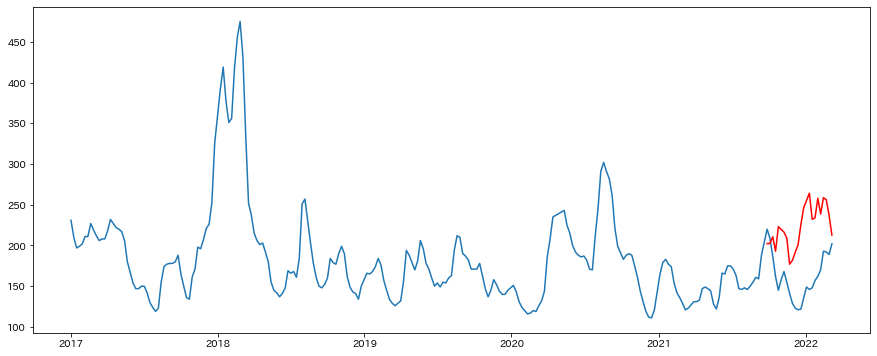

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
bestPred = result.predict('2021-09-27', '2022-03-07',exog=X_pred,freq="W-MON")
plt.plot(df["キャベツ"])
plt.plot(bestPred, "r")

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["キャベツ"],bestPred)

4928.561337053811